# Casebase 2
Muhammad Rafli Ramadhan - 1301200204

# Import data dan dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
import math

In [2]:
!wget https://raw.githubusercontent.com/raflidev/Machine-Learning-Case-Base-2/main/countrydata.csv

--2022-12-04 12:03:17--  https://raw.githubusercontent.com/raflidev/Machine-Learning-Case-Base-2/main/countrydata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9061 (8.8K) [text/plain]
Saving to: ‘countrydata.csv’

countrydata.csv     100%[===================>]   8.85K  --.-KB/s    in 0s      

2022-12-04 12:03:17 (62.7 MB/s) - ‘countrydata.csv’ saved [9061/9061]



# Data pada dataset

In [3]:
df = pd.read_csv('countrydata.csv', sep = ',')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Pengecekan kekosongan pada dataset

In [4]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Preprocessing

In [7]:
df.drop(columns = ['country'], inplace = True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


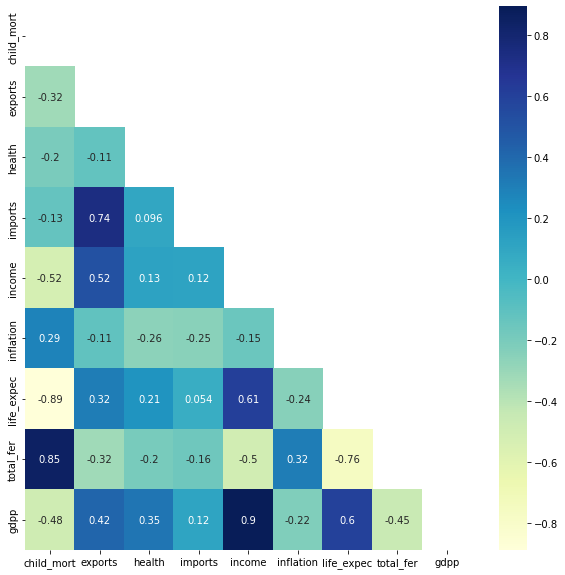

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=np.triu(df.corr()), ax=ax)

In [9]:
col = list(df.columns)
numerical_features = [*col]
print('Numerical Features :',*numerical_features)

Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


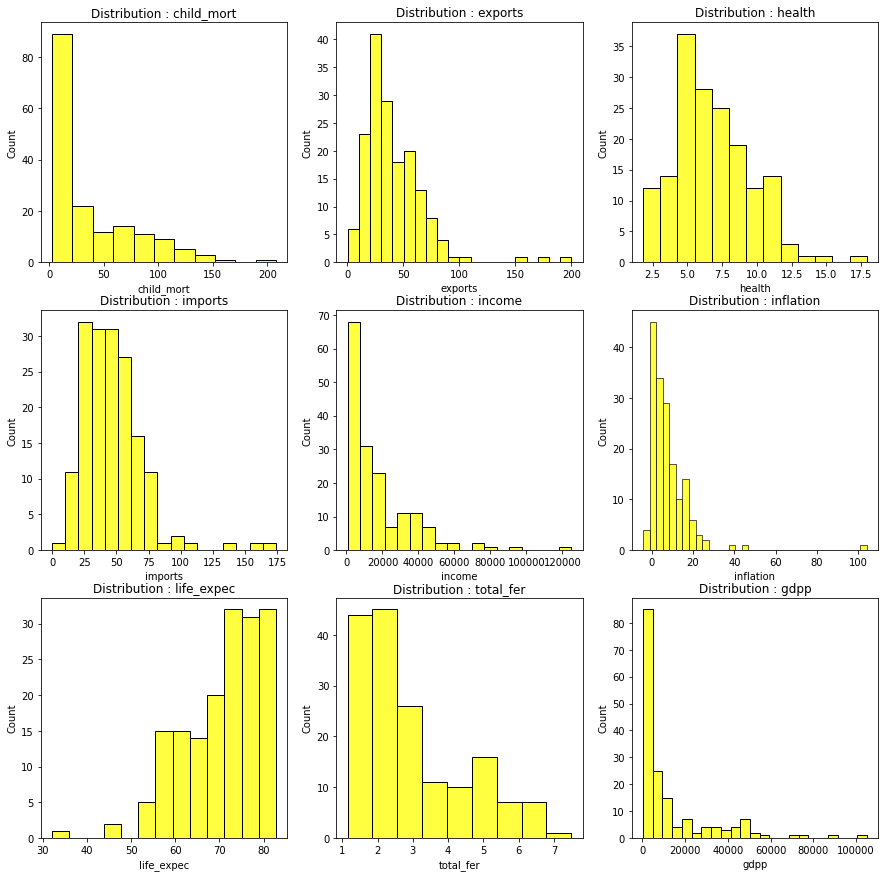

In [10]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.histplot(df[numerical_features[i]],color = "#ff0")
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

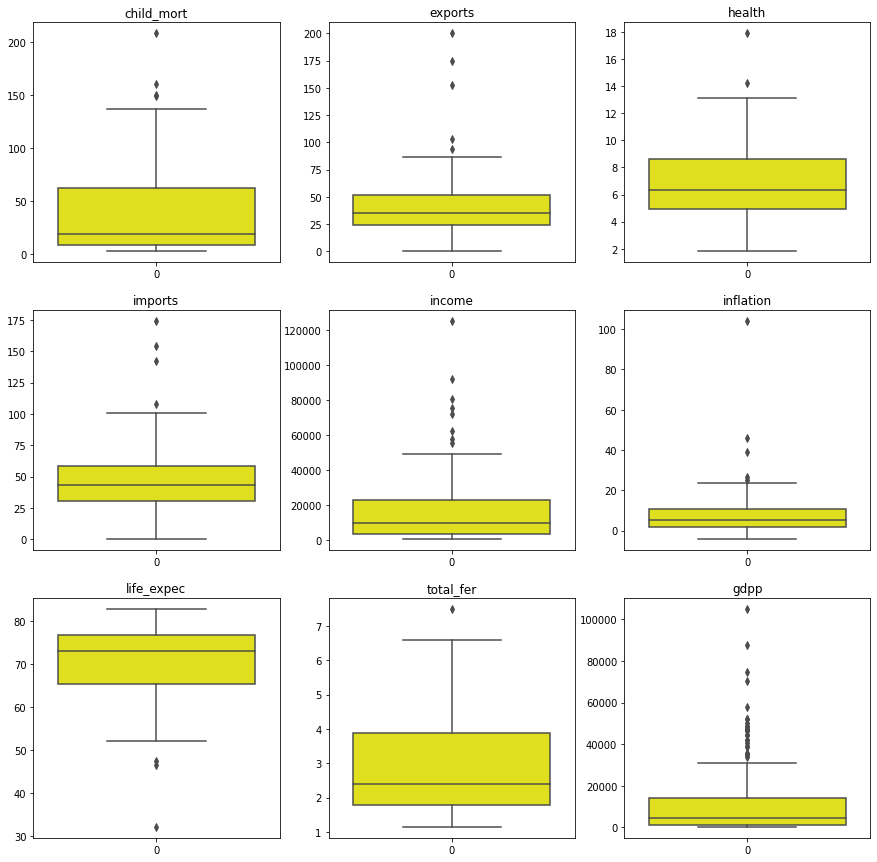

In [11]:
fig  = plt.subplots(nrows = 4,ncols = 4,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data=df[numerical_features[i]],color = "#ff0")
    plt.title(numerical_features[i])
plt.show()

In [12]:
df_selected = df[['gdpp', 'inflation']]

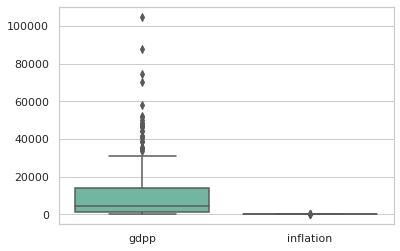

In [13]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_selected, orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 10)})

In [14]:
def outliersHandling(data):
    for i in data:
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        if i > upper or i < lower:
            data = data.replace(i, np.mean(data))
    return data

In [15]:
df_handled = pd.DataFrame(columns = [0, 1])

In [16]:
df_handled[0] = outliersHandling(df['gdpp'])
df_handled[1] = outliersHandling(df['inflation'])

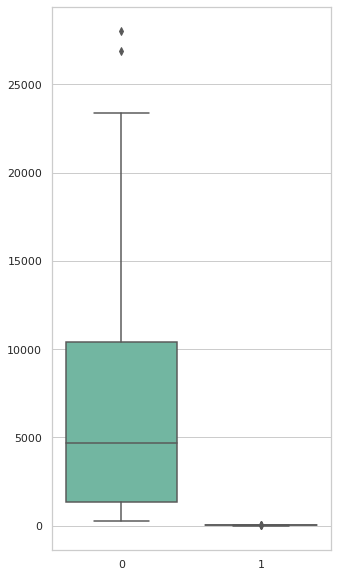

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_handled[[0, 1]], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 8)})

In [18]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_handled)
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1
0,0.011596,0.512965
1,0.138968,0.326945
2,0.152292,0.763247
3,0.118802,1.000000
4,0.431020,0.212326
...,...,...
162,0.098635,0.256670
163,0.477835,0.409985
164,0.038856,0.612927
165,0.038856,0.401163


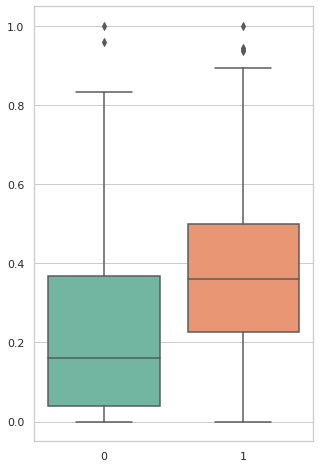

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_scaled, orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 8)})

Text(0, 0.5, 'inflation')

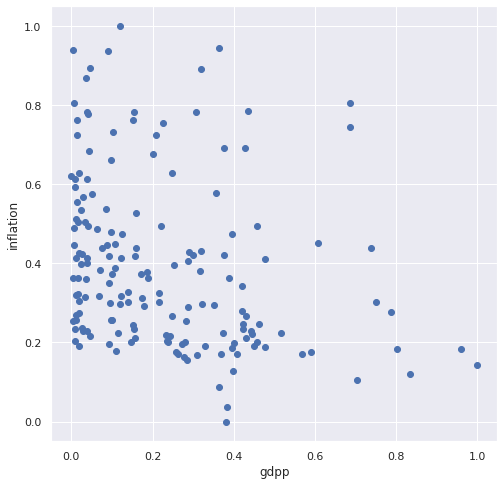

In [20]:
plt.subplots(figsize=(8,8))
plt.scatter(df_scaled[0], df_scaled[1])
plt.xlabel('gdpp')
plt.ylabel('inflation')

## K-Means Model

In [21]:
def euclidean(centroid, data):
    result = []
    for i in range(centroid.shape[0]):
        jarak = math.sqrt((data[0]-centroid.iloc[i][0])**2 + (data[1]-centroid.iloc[i][1])**2)
        result.append(jarak)
    return result

In [22]:
def centroid_random(k, random_state):
    np.random.seed(random_state)
    centroids = []
    for _ in range(k):
        r1 = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        centroids.append([r1, r2])
    return pd.DataFrame(centroids)

In [23]:
def clustering(df, centroids):
    clusters = []
    for i in range(df.shape[0]):
        euclid = euclidean(centroids, df.iloc[i])
        mins = min(euclid)
        for j in range(len(euclid)):
            if mins == euclid[j]:
                cluster = j
        clusters.append(cluster)
    return pd.DataFrame(clusters)

In [24]:
def new_centroid(df, k):
    centroids = []
    x1 = df.groupby('Cluster')[0].mean()
    x2 = df.groupby('Cluster')[1].mean()
    for i in range(k):
        centroids.append([x1[i], x2[i]])
    return pd.DataFrame(centroids)

In [25]:
def scatterplot(df, centroids, i):
    plt.subplots(figsize=(8,8))
    plt.scatter(x = df[0], y = df[1], c = df['Cluster'], cmap = 'tab10')
    plt.title('Iterasi ke {}'.format(i+1))
    for i in range(centroids.shape[0]):
        plt.scatter(centroids.iloc[i][0], centroids.iloc[i][1], color='red', marker = '+')
    plt.show()

In [26]:
def kmeans(df, centroids, k, nmax):
    i = 0
    old_cent = pd.DataFrame()
    while i < nmax and not centroids.equals(old_cent):
        old_cent = centroids
        clusters = clustering(df, centroids)
        df['Cluster'] = clusters
        scatterplot(df, centroids, i)
        centroids = new_centroid(df, k)
        i += 1
    return centroids

## Elbow Method

In [27]:
df_elbow = df_scaled[[0, 1]]

In [28]:
from sklearn.cluster import KMeans
wcss = []
K = range(2,11)
for i in K:
    training = KMeans(n_clusters=i, init='k-means++', random_state=42)
    training.fit(df_elbow)
    wcss.append(training.inertia_)

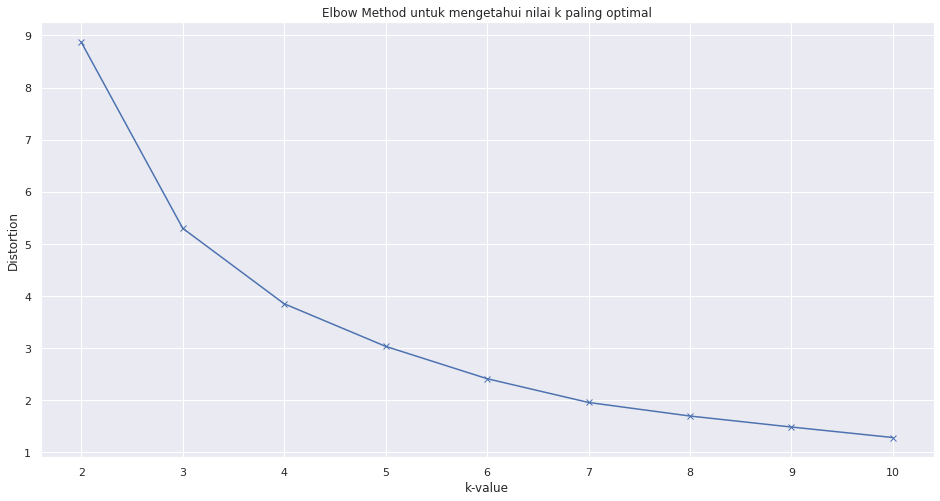

In [29]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k-value')
plt.ylabel('Distortion')
plt.title('Elbow Method untuk mengetahui nilai k paling optimal')
plt.show()

## Clustering

In [32]:
create_centroids = centroid_random(k = 9, random_state = 42)
create_centroids

,0,1
0,0.374540,0.950714
1,0.731994,0.598658
2,0.156019,0.155995
3,0.058084,0.866176
4,0.601115,0.708073
5,0.020584,0.969910
6,0.832443,0.212339
7,0.181825,0.183405
8,0.304242,0.524756


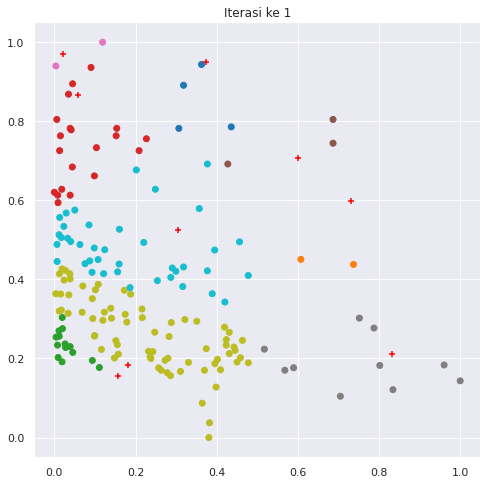

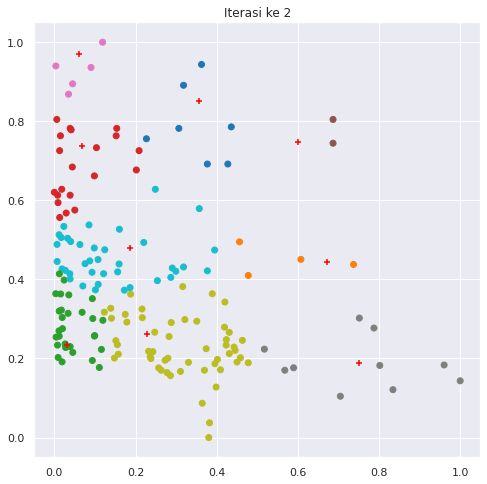

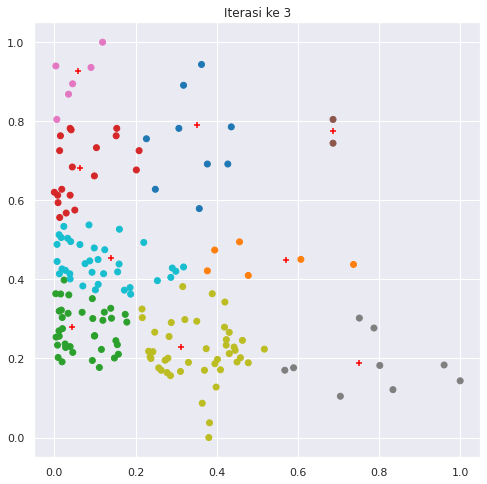

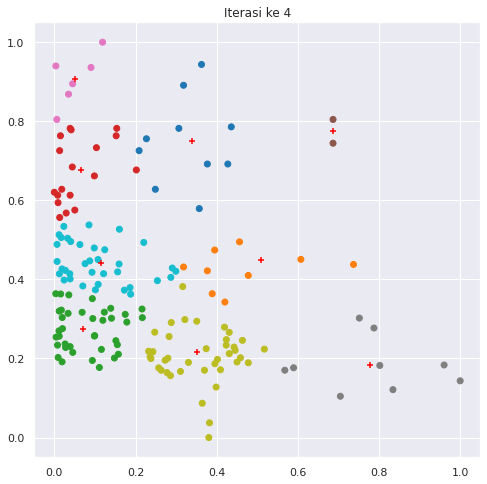

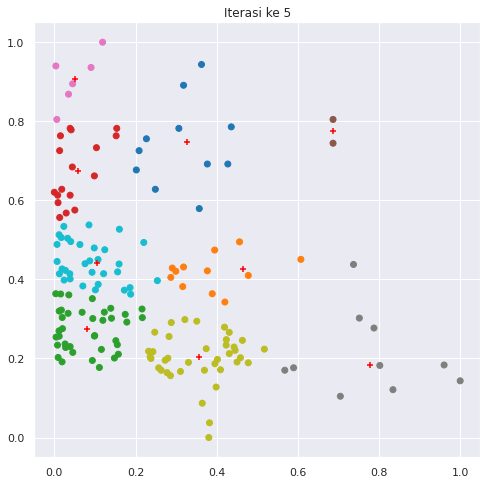

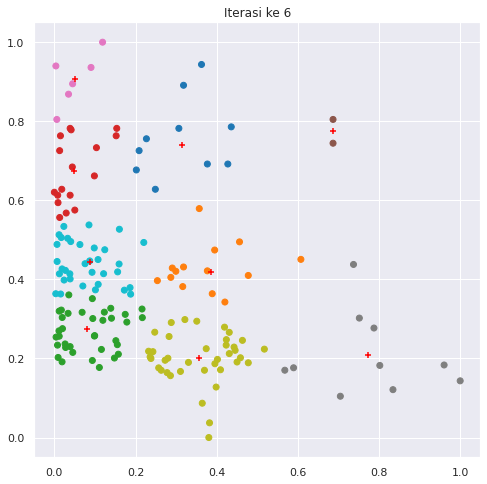

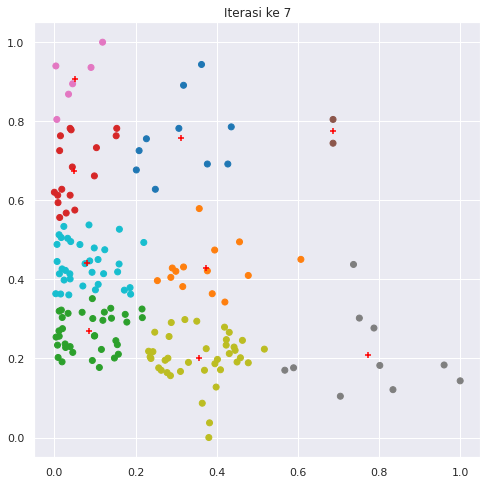

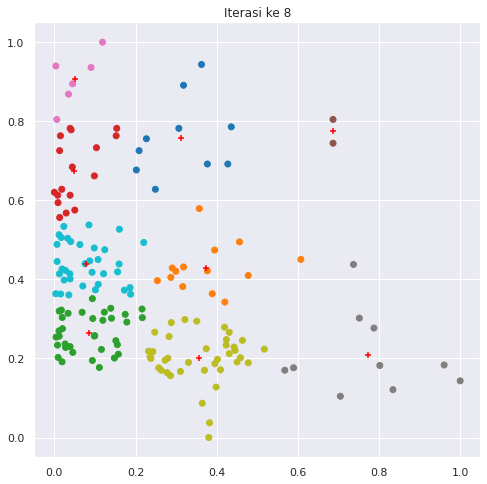

In [33]:
result = kmeans(df_scaled, create_centroids, k = 9, nmax = 100)

In [34]:
result

,0,1
0,0.311449,0.757234
1,0.374658,0.428683
2,0.085714,0.265653
3,0.048696,0.673055
4,0.686701,0.774521
5,0.049798,0.907303
6,0.773488,0.209853
7,0.357330,0.200200
8,0.078000,0.438219


### referensi
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

https://www.kaggle.com/code/warungsederhana/clustering-unsupervised-learning-on-country-data

https://www.jcchouinard.com/kmeans/

https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical